In [1]:
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
#https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [2]:
data=pd.read_csv('../dataset/iron_oilmonthly.csv',parse_dates=['date'])
data=data.dropna()
df=data[['oildata','date']]
df=df.set_index('date')
df=df.dropna()
df = df[:-1]

In [3]:
df['2010'] #find year 2010 data

,oildata
date,
2010-10-31,79.662
2010-11-30,79.662
2010-12-31,79.662


C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


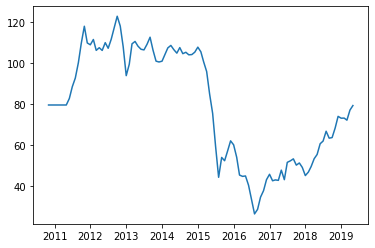

In [4]:
#check stationarity
#Next step is to find seasonality (s).
#Let's plot Moving average for 4, 6, 8 and 12 months.
plt.plot(df)

Text(0.5, 1.0, '4 Months Moving Average')

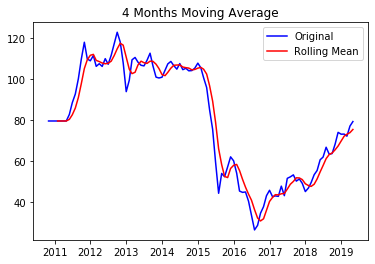

In [5]:
four_months_moving_average = df.rolling(window=4).mean()
plt.plot(df, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

Text(0.5, 1.0, '6 Months Moving Average')

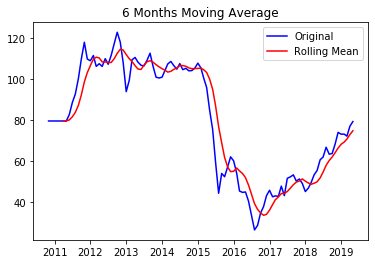

In [6]:
six_months_moving_average = df.rolling(window=6).mean()
plt.plot(df, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

Text(0.5, 1.0, '8 Months Moving Average')

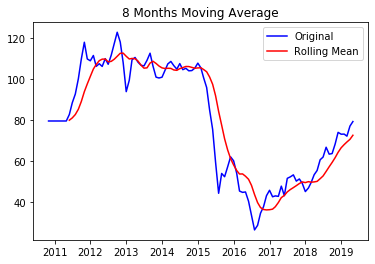

In [7]:
eight_months_moving_average = df.rolling(window=8).mean()
plt.plot(df, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

Text(0.5, 1.0, '12 Months Moving Average')

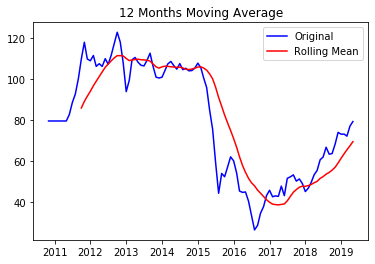

In [8]:
twelve_months_moving_average = df.rolling(window=12).mean()
plt.plot(df, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

In [9]:
# Dickey-Fuller Test for stationary check
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = df.rolling(window=12).mean() #best seasionality
    rolstd = df.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.oildata, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

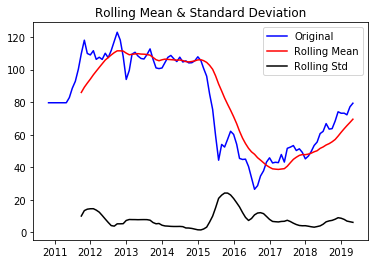

Results of Dickey-Fuller Test:
Test Statistic                  -1.368266
p-value                          0.597392
#Lags Used                       1.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [10]:
test_stationarity(df) #test statistics is gretaer than crical value so data is not stationary

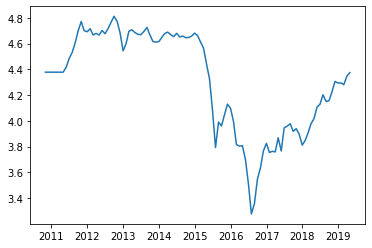

In [11]:
# make a Time Series Stationary
#Estimating & Eliminating Trend
#log transform here for simplicity:
df_log = np.log(df)
plt.plot(df_log)

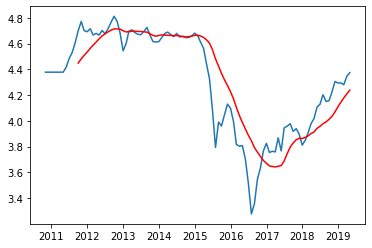

In [12]:
moving_avg = df_log.rolling(window = 12).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [13]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.head(12)

,oildata
date,
2010-10-31,NaN
2010-11-30,NaN
2010-12-31,NaN
2011-01-31,NaN
2011-02-28,NaN
2011-03-31,NaN
2011-04-30,NaN
2011-05-31,NaN
2011-06-30,NaN


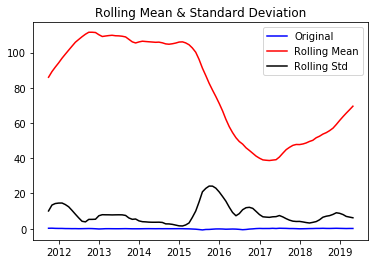

Results of Dickey-Fuller Test:
Test Statistic                 -2.955584
p-value                         0.039256
#Lags Used                      1.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


In [14]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff) 
#the test statistic is smaller than the 5% or 10% critical values so we 
#can say with 95% or 90% confidence that this is a stationary series.

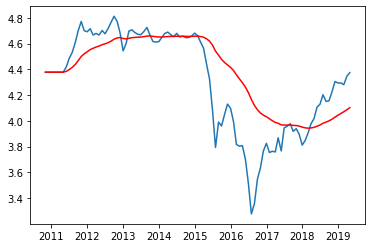

In [15]:
"""
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
However, a drawback in this above particular approach is that the time-period 
has to be strictly defined. In this case we can take yearly averages but
in complex situations like forecasting a stock price, its difficult to come 
up with a number. So we take a ‘weighted moving average’ where more recent 
values are given a higher weight. There can be many technique for assigning 
weights. A popular one is exponentially weighted moving average(ewma) where weights 
are assigned to all the previous values with a decay factor.
"""
expwighted_avg = df_log.ewm(halflife=12).mean()
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')

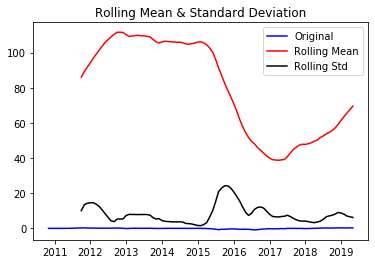

Results of Dickey-Fuller Test:
Test Statistic                  -1.799611
p-value                          0.380655
#Lags Used                       1.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


In [16]:
df_log_ewma_diff = df_log - expwighted_avg
test_stationarity(df_log_ewma_diff) #more better then previous one

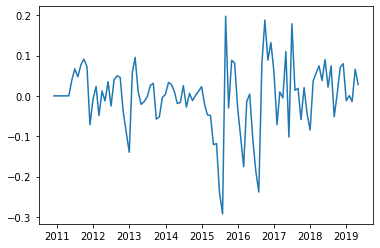

In [17]:
#Eliminating Trend and Seasonality two technique are Differencing and Decomposing
#Differencing
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)
#This appears to have reduced trend considerably. Lets verify using our plots

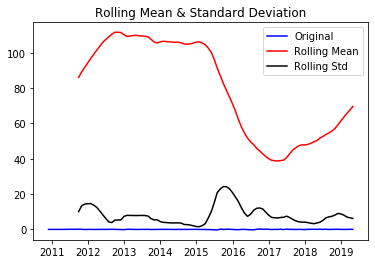

Results of Dickey-Fuller Test:
Test Statistic                -7.334799e+00
p-value                        1.103722e-10
#Lags Used                     0.000000e+00
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


In [18]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff) #Dickey-Fuller test statistic is less than the 1%,5% and 10% critical value

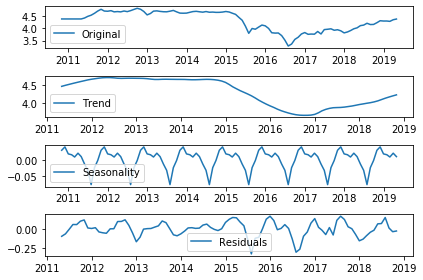

In [19]:
#Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

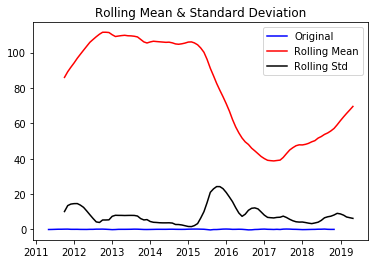

Results of Dickey-Fuller Test:
Test Statistic                -6.476194e+00
p-value                        1.329328e-08
#Lags Used                     2.000000e+00
Number of Observations Used    8.800000e+01
Critical Value (1%)           -3.506944e+00
Critical Value (5%)           -2.894990e+00
Critical Value (10%)          -2.584615e+00
dtype: float64


In [20]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose)

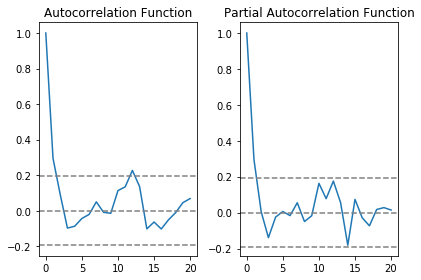

In [21]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [22]:
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2. 
#q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

In [23]:
len(df)

103

In [24]:
# from statsmodels.tsa.arima_model import ARIMA
# # model = ARIMA(df_log, order=(2,1,2))
# # results_ARIMA = model.fit(disp=-1)
# # plt.plot(df_log_diff)
# # plt.plot(results_ARIMA.fittedvalues, color='red')
# # #plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff)**2))
# model = ARIMA(train, order=(3,1,0))
# model_fit = model.fit(disp=0)
# yhat = model_fit.forecast(len(test))[0]
# yhat

In [25]:
#prediction by ARIMA MODEL of test data
from statsmodels.tsa.arima_model import ARIMA
#size = int(len(ts_log)-100)
#train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
train_arima,test_arima = df_log[:98].oildata,df_log[98:].oildata
history = [x for x in train_arima]

predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 2)) #p,d,q
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast() #forecast the next value
    print("output = ",output[0])
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    print("original_first", original_value)
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    print("orginal second", original_value)
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

Printing Predicted vs Expected Values...


output =  [4.33705283]
original_first 4.293475111221884
orginal second 73.22047618999997
predicted = 76.481802,   expected = 73.220476,   error = 4.454117  %
output =  [4.28738883]
original_first 4.294101617351093
orginal second 73.26636364000002
predicted = 72.776189,   expected = 73.266364,   error = 0.669031  %
output =  [4.27708801]
original_first 4.2802346234901805
orginal second 72.25739130000002
predicted = 72.030383,   expected = 72.257391,   error = 0.314167  %
output =  [4.27029319]
original_first 4.346127399300993
orginal second 77.17899999999997
predicted = 71.542608,   expected = 77.179000,   error = 7.303012  %
output =  [4.36874363]
original_first 4.37433407919163
orginal second 79.38695651999998
predicted = 78.944386,   expected = 79.386957,   error = 0.557485  %

 Means Error in Predicting Test Case Articles : 2.659562  %


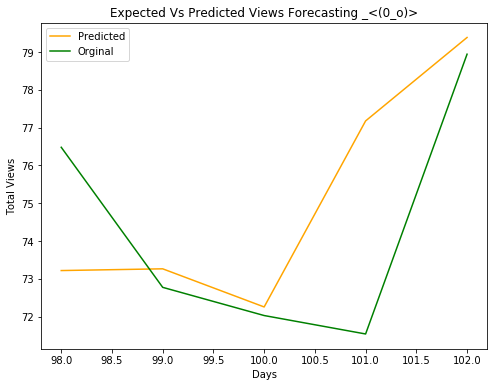

In [26]:
plt.figure(figsize=(8, 6))
test_day = [t+98
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, originals, color = 'orange')
plt.plot(test_day, predictions, color= 'green')
plt.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

In [27]:
len(history) #history save all data train_arima+test_arima


103

In [28]:
his = history.copy()

In [29]:
#forecasting by ARIMA MODEL
print('forecasting oilPrice till 2020') 
date_index=pd.date_range(start='30/06/2019', periods=24,freq='M')
#data.index = date_index 
forecast_oil_val = []
for i in range(len(date_index)):
    model = ARIMA(his, order=(2,1,2))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast() #forecast the next month value
    forecast_value = output[0]
    his.append(forecast_value[0])
    forecast_real_value = np.exp(forecast_value)
    forecast_oil_val.append(forecast_real_value[0])
    print(forecast_real_value[0])

forecasting oilPrice till 2020
80.68827245281514
80.65571561590383
79.95854772568767
79.47512065224399
79.48365903412751
79.7400257424759
79.9220740565805
79.92128239401298
79.82699449766913
79.7598278435674
79.76056017181367
79.79640443586628
79.82250134747764
79.82334631047618
79.81098049875663
79.80214274184964
79.80269956431711
79.80822546775035
79.81247803801122
79.8132325194856
79.81211536062065
79.81145733226913
79.81210217574908
79.81345227290068


In [30]:
# from this forecast oil price want to predict iron price 
forecast_oil_val

[80.68827245281514,
 80.65571561590383,
 79.95854772568767,
 79.47512065224399,
 79.48365903412751,
 79.7400257424759,
 79.9220740565805,
 79.92128239401298,
 79.82699449766913,
 79.7598278435674,
 79.76056017181367,
 79.79640443586628,
 79.82250134747764,
 79.82334631047618,
 79.81098049875663,
 79.80214274184964,
 79.80269956431711,
 79.80822546775035,
 79.81247803801122,
 79.8132325194856,
 79.81211536062065,
 79.81145733226913,
 79.81210217574908,
 79.81345227290068]

In [31]:
forecastedoil = pd.DataFrame()
forecastedoil['oilprice']  = forecast_oil_val
forecastedoil['date'] = date_index
forecastedoil=forecastedoil.set_index('date')
forecastedoil

,oilprice
date,
2019-06-30,80.688272
2019-07-31,80.655716
2019-08-31,79.958548
2019-09-30,79.475121
2019-10-31,79.483659
2019-11-30,79.740026
2019-12-31,79.922074
2020-01-31,79.921282
2020-02-29,79.826994


In [32]:
data.head()

,ironprice,date,oildata
0,148.48,2010-10-31,79.662
1,160.55,2010-11-30,79.662
2,168.53,2010-12-31,79.662
3,179.63,2011-01-31,79.662
4,187.18,2011-02-28,79.662


In [33]:
import pmdarima as pm
#in auto arime model used oil data as aux value for predicting iron price
# SARIMAX Model
sxmodel = pm.auto_arima(data[['ironprice']], exogenous=data[['oildata']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=657.608, BIC=672.673, Fit time=0.570 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=715.557, BIC=723.089, Fit time=0.041 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=676.382, BIC=688.936, Fit time=0.239 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=659.897, BIC=672.451, Fit time=0.247 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=655.750, BIC=673.326, Fit time=0.511 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=667.527, BIC=682.592, Fit time=0.392 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=693.088, BIC=705.642, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=656.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  104
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -320.875
Date:                            Thu, 27 Jun 2019   AIC                            655.750
Time:                                    15:03:12   BIC                            673.326
Sample:                                         0   HQIC                           662.841
                                            - 104                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6842      0.995      0.688      0.492      -1.266       2.634
x1            -0.1088      0.133     -0.819      0.413      -0.369       0.152
ar.L1         -0.3496      0.178     -1.962      0.050      -0.699      -0.000
ma.L1          0.7746      0.143      5.411      0.000       0.494       1.055
ar.S.L12      -0.3038      0.169     -1.800      0.072      -0.635       0.027
ma.S.L12      -0.6063      0.199     -3.039      0.002      -0.997      -0.215
sigma2        59.8133     10.658      5.612      0.000      38.924      80.702
===================================================================================
Ljung-Box (Q):                       48.53   Jarque-Bera (JB):                 8.69
Prob(Q):                              0.17   Prob(JB):                         0.01
Heteroskedasticity (H):               0.40   Skew:                             0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

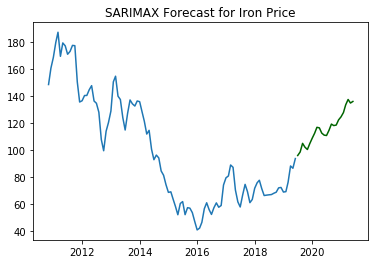

In [39]:
# Forecast
#forecasting iron price where used exogenous variable which is forecast oil price
import matplotlib.pylab as plt
%matplotlib inline
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=forecastedoil[['oilprice']], 
                                  return_conf_int=True)


#data = data.set_index('date')
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=date_index)
lower_series = pd.Series(confint[:, 0], index=date_index)
upper_series = pd.Series(confint[:, 1], index=date_index)

# Plot
plt.plot(data['ironprice'])
plt.plot(fitted_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

plt.title("SARIMAX Forecast for Iron Price")
plt.show()

In [40]:
forecastedoil['ironprice'] = fitted

In [41]:
forecastedoil

,oilprice,ironprice
date,,
2019-06-30,80.688272,95.951246
2019-07-31,80.655716,98.554975
2019-08-31,79.958548,104.945590
2019-09-30,79.475121,102.112178
2019-10-31,79.483659,100.387981
2019-11-30,79.740026,104.705380
2019-12-31,79.922074,108.714216
2020-01-31,79.921282,112.452095
2020-02-29,79.826994,116.816191
